## preprocessing

<ipython-input-1-969ae67bdd3a>:11: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n_values, u_signal, use_line_collection=True)


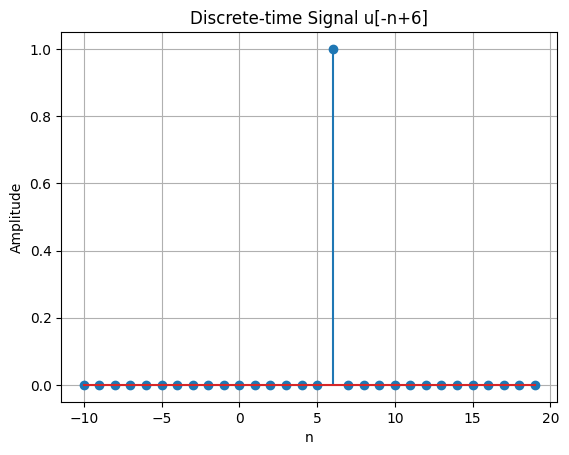

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of n values
n_values = np.arange(-10, 20, 1)

# Define the signal u[-n+6]
u_signal = np.where(n_values == 6, 1, 0)

# Plot the signal
plt.stem(n_values, u_signal, use_line_collection=True)
plt.title('Discrete-time Signal u[-n+6]')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import glob , os
import librosa.display
import IPython.display as ipd
import pywt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

*******************************************************************

Functions

In [ ]:
#signal plotting
def signal_plot(signal):
  # Create a time axis in seconds
  time = np.arange(0, len(signal)) / sample_rate

  # Plot the waveform
  plt.figure(figsize=(12, 4))
  plt.plot(time, signal)
  plt.title('Waveform of Audio Signal')
  plt.xlabel('Time (seconds)')
  plt.ylabel('Amplitude')
  plt.show()

In [ ]:
#coeffs plotting
def coeffs_plot(coeffs):
  # Plot the wavelet coefficients
  plt.figure(figsize=(10, 6))
  for i, coef in enumerate(coeffs):
      plt.subplot(len(coeffs), 1, i+1)
      plt.plot(coef)
      plt.title(f'Level {i+1} Coefficients')

  plt.tight_layout()
  plt.show()

In [ ]:
# Function to extract MFCC features from audio files
def mfcc_extract(signal, num_mfcc=13):
    global mfccs
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13)
    mfccs=  np.mean(mfccs, axis=1)  # Return the mean of each MFCC coefficient

In [ ]:
#wavelet transformation
def wave_trans(audio):
  # Select Symlet wavelet
  global wavelet
  wavelet = 'sym5'

  # Perform Wavelet Decomposition
  global coeffs , features
  coeffs = pywt.wavedec(audio, wavelet, level=5)
  # return coeffs
  #features = np.concatenate(coeffs)


# The 'features' array now contains the wavelet features of the audio
# These features can be used as input for a machine learning model

In [ ]:
#load audio files
def load(file_path):
  global audio
  audio, sample_rate = librosa.load(file_path, sr=None)
  mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
  feature = np.mean(mfccs.T, axis=0)


*****************************************************************

In [ ]:
load("/content/drive/MyDrive/DSP_project /19/198/19-198-0000.flac")

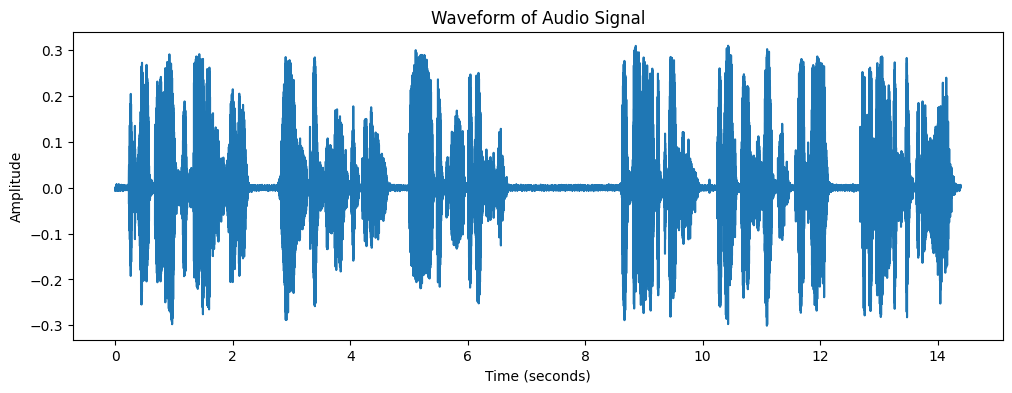

In [ ]:
signal_plot(audio)

In [ ]:
wave_trans(audio)

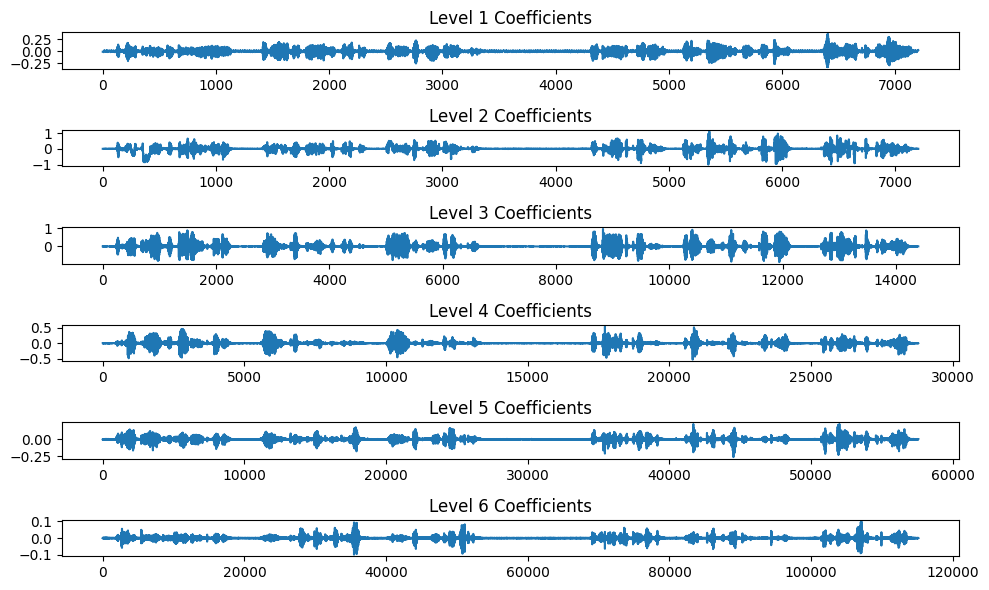

In [ ]:
coeffs_plot(coeffs)

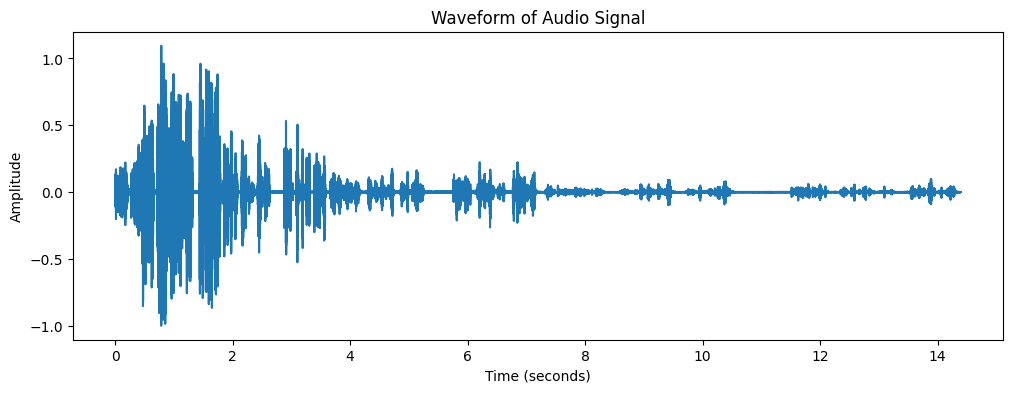

In [ ]:
features=np.concatenate(coeffs)
signal_plot(features)

In [ ]:
features.shape

(230281,)

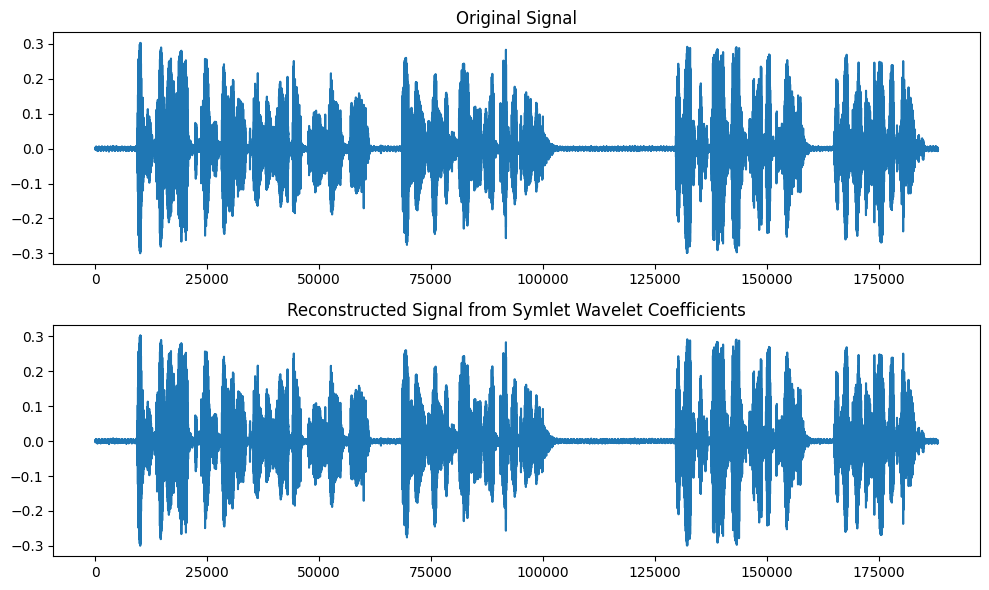

In [ ]:
# Reconstruct the signal from the wavelet coefficients
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Plot the original and reconstructed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title('Original Signal')

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal)
plt.title('Reconstructed Signal from Symlet Wavelet Coefficients')



plt.tight_layout()
plt.show()

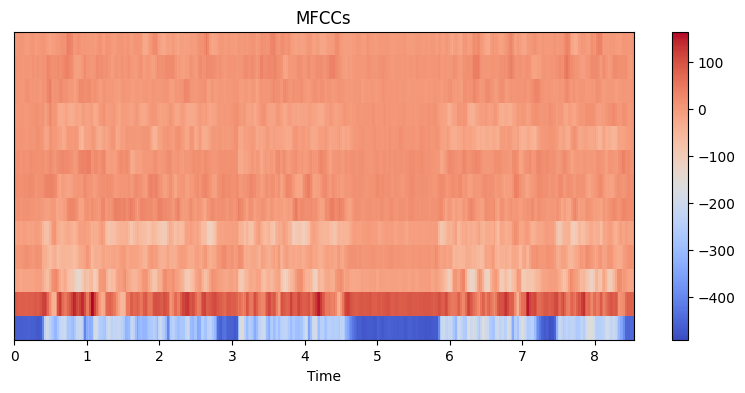

In [ ]:
# Perform MFCC extraction using librosa
mfccs = librosa.feature.mfcc(y=audio, sr=44100, n_mfcc=13)

# Display MFCCs (for demonstration purposes)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()

## **model**

In [ ]:
# # Specify the path to your dataset (organized by class)
# data_path = '/content/drive/MyDrive/DSP_project '

# # Collect MFCC features and corresponding labels
# mfcc_features = []
# labels = []

# for label in os.listdir(data_path):
#     label_path = os.path.join(data_path, label)
#     for chapter in os.listdir(label_path):

#         chapter_path = os.path.join(label_path, chapter)

#         for audio in os.listdir(chapter_path) :
#           first = os.path.join(label_path, chapter)
#           audio_path = os.path.join(first, audio)
#           print(f"chapter path : {chapter_path}")
#           print(f"chapter : {chapter}")
#           print(f"audio path : {audio_path}")
#           labels.append(label)
#           print(f"label : {label}")
#           print("********************************")

# len(labels)

**Without using symlet wavelets**

In [ ]:
# Function to extract MFCC features from audio files
def extract_mfcc(file_path, num_mfcc=13):
    audio, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=num_mfcc)
    return np.mean(mfccs, axis=1)  # Return the mean of each MFCC coefficient

# Specify the path to your dataset (organized by class)
data_path = '/content/drive/MyDrive/DSP_project '

# Collect MFCC features and corresponding labels
mfcc_features = []
labels = []

for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    for chapter in os.listdir(label_path):
        chapter_path = os.path.join(label_path, chapter)
        for audio in os.listdir(chapter_path) :
          first = os.path.join(label_path, chapter)
          audio_path = os.path.join(first, audio)
          mfcc = extract_mfcc(audio_path)
          mfcc_features.append(mfcc)
          labels.append(label)

# Convert lists to NumPy arrays
X = np.array(mfcc_features)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

          19       1.00      1.00      1.00        29
          26       1.00      1.00      1.00        17
          27       1.00      1.00      1.00        28

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



cross validation

In [ ]:
# Specify the number of folds for cross-validation
num_folds = 5

# Create an SVM classifier with a linear kernel
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))

# Create a StratifiedKFold object for cross-validation
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=stratified_kfold, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print average accuracy and standard deviation
print(f"Average Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Accuracy: 1.00
Standard Deviation: 0.00


**using coefficiont [0]**

In [ ]:
# Specify the path to your dataset (organized by class)
data_path = '/content/drive/MyDrive/DSP_project '

# Collect MFCC features and corresponding labels
mfcc_features = []
labels = []

for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    for chapter in os.listdir(label_path):
        chapter_path = os.path.join(label_path, chapter)
        for audio in os.listdir(chapter_path) :
          first = os.path.join(label_path, chapter)
          audio_path = os.path.join(first, audio)
          load(audio_path)
          wave_trans(audio)
          mfcc_extract(coeffs[0])
          mfcc_features.append(mfccs)
          labels.append(label)

# Convert lists to NumPy arrays
X = np.array(mfcc_features)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

          19       1.00      1.00      1.00        29
          26       1.00      1.00      1.00        17
          27       1.00      1.00      1.00        28

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



**processing after splitting**

In [ ]:
# Specify the path to your dataset (organized by class)
data_path = '/content/drive/MyDrive/DSP_project '

# Collect MFCC features and corresponding labels
audios = []
labels = []

for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    for chapter in os.listdir(label_path):
        chapter_path = os.path.join(label_path, chapter)
        for audio in os.listdir(chapter_path) :
          first = os.path.join(label_path, chapter)
          audio_path = os.path.join(first, audio)
          load(audio_path)
          audios.append(audio)
          labels.append(label)

# Convert lists to NumPy arrays
X = np.array(audios)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mfcc_features_train = []
mfcc_features_test = []

for audio in X_train :
  wave_trans(audio)
  mfcc_extract(coeffs[0])
  mfcc_features_train.append(mfccs)

for audio in X_test :
  wave_trans(audio)
  mfcc_extract(coeffs[0])
  mfcc_features_test.append(mfccs)



# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(mfcc_features_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(mfcc_features_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

          19       1.00      1.00      1.00        29
          26       1.00      1.00      1.00        17
          27       1.00      1.00      1.00        28

    accuracy                           1.00        74
   macro avg       1.00      1.00      1.00        74
weighted avg       1.00      1.00      1.00        74



**concatenating coefficionts**

In [ ]:
# Specify the path to your dataset (organized by class)
data_path = '/content/drive/MyDrive/DSP_project '

# Collect MFCC features and corresponding labels
mfcc_features = []
labels = []

for label in os.listdir(data_path):
    label_path = os.path.join(data_path, label)
    for chapter in os.listdir(label_path):
        chapter_path = os.path.join(label_path, chapter)
        for audio in os.listdir(chapter_path) :
          first = os.path.join(label_path, chapter)
          audio_path = os.path.join(first, audio)
          load(audio_path)
          wave_trans(audio)
          features = np.concatenate(coeffs)
          mfcc_extract(features)
          mfcc_features.append(mfccs)
          labels.append(label)

# Convert lists to NumPy arrays
X = np.array(mfcc_features)
y = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

classification_rep = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)


Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

          19       0.96      0.93      0.95        29
          26       1.00      1.00      1.00        17
          27       0.93      0.96      0.95        28

    accuracy                           0.96        74
   macro avg       0.97      0.97      0.96        74
weighted avg       0.96      0.96      0.96        74



In [ ]:
# Specify the number of folds for cross-validation
num_folds = 5

# Create an SVM classifier with a linear kernel
svm_classifier = make_pipeline(StandardScaler(), SVC(kernel='rbf', C=1.0))

# Create a StratifiedKFold object for cross-validation
stratified_kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=stratified_kfold, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Print average accuracy and standard deviation
print(f"Average Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation: {np.std(cv_scores):.2f}")

Cross-Validation Scores: [1.         0.97297297 0.95890411 0.94520548 1.        ]
Average Accuracy: 0.98
Standard Deviation: 0.02
